<a href="https://colab.research.google.com/github/maddisurekha1234/Dental_Informatics_Project/blob/main/Authors_Collaboration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Auhor analysis and ranking the author based on the total number of articles written. keep it
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Author_info_withdoi_pubmed_collbration.csv",encoding = "ISO-8859-1")
df['authorId'] = df['authorId'].fillna(0).astype(int)
df['count'] = df.groupby('name')['name'].transform('count')
df.drop_duplicates('name', inplace=True)
df.nlargest(5, ['count'])[["name","authorId","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=False)
df1 = df1.dropna(subset=['Rank'])
header = ["name", "authorId", "Rank"]
df1.to_csv('author_distribution.csv', columns = header)
plotgraph = pd.read_csv("author_distribution.csv")
plotgraph = df.nlargest(10, ['count'])[["name","count"]]
rank=pd.read_csv("author_distribution.csv")
top10rank = rank.head(10)
plotgraph['Rank'] = top10rank['Rank'].values
plotgraph

,name,count,Rank
2,T. Schleyer,19,1.0
34,M. Walji,13,2.0
25,E. Kalenderian,11,3.0
51,A. Acharya,10,4.0
15,T. Thyvalikakath,9,5.5
45,H. Spallek,9,5.5
33,Joel M. White,7,7.0
59,Mei Song,5,8.5
174,R. Ramoni,5,8.5
1,L. Johnson,4,11.5


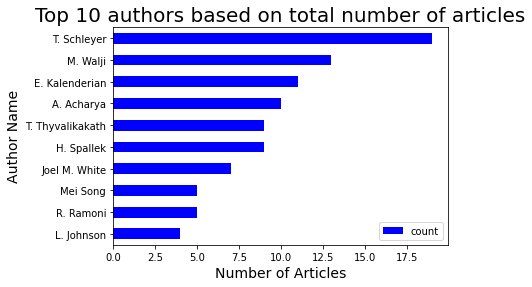

,name,count
2,T. Schleyer,19
34,M. Walji,13
25,E. Kalenderian,11
51,A. Acharya,10
15,T. Thyvalikakath,9
45,H. Spallek,9
33,Joel M. White,7
59,Mei Song,5
174,R. Ramoni,5
1,L. Johnson,4


In [ ]:
#Plotting a graph for top 10 authors with the maximum number of articles published.
plotgraph.set_index("name",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'Blue')
ax.invert_yaxis()
plt.title("Top 10 authors based on total number of articles",fontsize=20)
plt.xlabel("Number of Articles",fontsize=14)
plt.ylabel("Author Name",fontsize=14)
plt.show()
plotgraph = df.nlargest(10, ['count'])[["name","count"]]
plotgraph

In [ ]:
#Reading the author table for data analysis keep it
import pandas as pd
coauthordf = pd.read_csv("Author_info_withdoi_pubmed_collbration.csv")
coauthordf['authorId'] = coauthordf['authorId'].fillna(0).astype(int)
coauthordf

,Unnamed: 0,article_id,authorId,name,url,Rank
0,0,10.5455/aim.2012.20.47-55,6589245,Fedja Masic,https://www.semanticscholar.org/author/6589245,1.0
1,1,10.1177/154407370301700108,2107747571,L. Johnson,https://www.semanticscholar.org/author/2107747571,1.0
2,2,10.1177/154407370301700104,2169003,T. Schleyer,https://www.semanticscholar.org/author/2169003,1.0
3,3,10.1177/154407370301700103,2169003,T. Schleyer,https://www.semanticscholar.org/author/2169003,1.0
4,4,10.1177/154407370301700105,1690314,Dean F. Sittig,https://www.semanticscholar.org/author/1690314,1.0
...,...,...,...,...,...,...
528,528,PMCID:18487785,8981123,J. Psutka,https://www.semanticscholar.org/author/8981123,NaN
529,529,PMCID:27139408,32246566,J. Zvárová,https://www.semanticscholar.org/author/32246566,NaN
530,530,PMCID:27139408,3323317,K. Chleborad,https://www.semanticscholar.org/author/3323317,NaN
531,531,PMCID:27139408,3218479,K. Zvára,https://www.semanticscholar.org/author/3218479,NaN


In [ ]:
#Authors and co authors for all the articles. keep it
import numpy as np
group = coauthordf.groupby('article_id')
df2 = group.apply(lambda x: x['name'].unique())
df2 = df2.apply(pd.Series)
df2 = df2.replace(np.nan, '', regex=True)
df2.to_csv("AuthorCollaboration.csv")
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2002.66.5.TB03542.X,J. C. Atkinson,G. G. Zeller,C. Shah,,,,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2005.69.3.TB03927.X,L. Rajab,Z. Baqain,,,,,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2011.75.5.TB05086.X,Joel M. White,E. Kalenderian,P. Stark,Rachel L Ramoni,R. Vaderhobli,M. Walji,,,,,,,,,,,,,,,,,,,,
10.1002/J.0022-0337.2012.76.1.TB05241.X,T. Schleyer,T. Thyvalikakath,H. Spallek,Michael P. Dziabiak,L. Johnson,,,,,,,,,,,,,,,,,,,,,
10.1007/978-3-319-17272-9_9,E. Kalenderian,M. Walji,R. Ramoni,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMCID:25308567,E. Leonardi,A. Agocs,S. Fragkiskos,N. Kasfikis,J. Le Goff,M. Cristalli,V. Luzzi,A. Polimeni,,,,,,,,,,,,,,,,,,
PMCID:26034034,S. G. Reed,Shawn S. Adibi,Mullen Coover,R. Gellin,A. Wahlquist,Anitha AbdulRahiman,Lindsey H Hamil,M. Walji,P. O'Neill,E. Kalenderian,,,,,,,,,,,,,,,,
PMCID:26798898,D. T. Ford,,,,,,,,,,,,,,,,,,,,,,,,,
